In [243]:
import json
import pandas as pd
import os
import re 
import numpy as np
import matplotlib.pyplot as plt

# 加载数据

In [244]:
##读出json数据并转为dataframe格式
def readjson(path):
    df = pd.DataFrame()
    nick = []
    date = []
    content = []
    for fpathe,dirs,fs in os.walk(path):
        for f in fs:
            if f.find("before")==-1 and f.find("after")==-1:
                filename = os.path.join(fpathe,f)

                ##打开json文件,选择字段
                fp = open(filename,encoding='UTF-8')
                try:
                    JsonObject = json.loads(fp.read())
                    page = JsonObject['response']['list']
                

                    ##读出用户昵称, 用户发文时间,发文内容
                    for post in page:    
                        nick.append(post['trackback_author_nick'])
                        date.append(post['trackback_date'])
                        content.append(post['content'])
                except:
                    print('here')
    df['nick'] = nick
    df['date'] = date
    df['content'] = content
    return df

### 统计地震前后的数据

In [245]:
ENall = readjson('./附件/附件1-ENalljson/')
JPall = readjson('./附件/附件2-JPalljson/')


ENallB = ENall[ENall['date']<1299822360]
ENallA = ENall[ENall['date']>1299822360]

JPallB = JPall[JPall['date']<1299822360]
JPallA = JPall[JPall['date']>1299822360]


ENall.head()

here
here
here
here


,nick,date,content
0,therealjuliann,1299216297,Never be ashamed of who you are. Be ashamed of...
1,ciara,1299216630,"Look what I found..MB, Ciara, Lil Twist and Ty..."
2,hugogloss,1299216508,kkkkkkkkkkkkkkkkk http://migre.me/3ZfrG D-I-V-A!!
3,yahoo,1299214854,Kim Kardashian&#39;s new song: &quot;makes Ke$...
4,iamdiddy,1299215461,&quot;The hardest thing to do is watch the one...


In [246]:
print(JPall)

                   nick        date  \
0                 qanow  1299216182   
1                hatebu  1299217565   
2              mokuzen1  1299217244   
3                2chmtm  1299217502   
4            kokoro3916  1299217724   
5                  qma6  1299215598   
6          kettaro_nico  1299218039   
7              soi_4sca  1299216327   
8               ksorano  1299216786   
9             hirougaya  1299215386   
10                tsuda  1299217269   
11             soi_4sca  1299216327   
12             s_uemura  1299216165   
13           ishikaries  1299214934   
14          kaidokuchan  1299218427   
15            koshi2353  1299217727   
16         lady_smoker_  1299215501   
17       yomiuri_online  1299217107   
18         nikkeionline  1299214863   
19           2ch_matome  1299216293   
20             psptakeo  1299216994   
21                 vgvd  1299215489   
22         nikkeionline  1299216666   
23           tired_nova  1299216558   
24                 baoh  

# 网络构建

In [247]:
import networkx as nx

In [248]:
def bulid_net(df):
    G = nx.Graph()
    for row in df.index:
        record = df.loc[row]
        c_nick = record['nick']
        
        
        if c_nick in G:
            pass
        else:
            G.add_node(c_nick)

       
        content = str(record['content'])
        if content:
            
             ##检查发文中是否@其他人
            inds = [m.start() for m in re.finditer('@', content)]
            
            ##找到用户a@的人用户b
            for ind in inds:
                ind = content.index('@')
                n_nick = ""
                while content[ind]!=' 'and content[ind] != ':' and ind < len(content) - 1:
                    ind = ind + 1
                    n_nick+=content[ind]

#                 如果@的用户已经在网络中
                if n_nick in G:
                    pass
                else:
                    G.add_node(n_nick)

#                 用户之间建立边
                G.add_edge(c_nick, n_nick)
            

    return G

In [268]:
def drop_diff_point(G1,G2):
    for node in list(G1.nodes()):
        if node not in G2:
            G1.remove_node(node)
    for node in list(G2.nodes()):
        if node not in G1:
            G2.remove_node(node)
    return G1,G2 

In [269]:

EnBG = bulid_net(ENallB)
EnAG = bulid_net(ENallA)

JpBG = bulid_net(JPallB)
JpAG = bulid_net(JPallA)


In [270]:
EnBG,EnAG = drop_diff_point(EnBG,EnAG)
JpBG,JpAG = drop_diff_point(JpBG,JpAG)

In [271]:
nx.write_gml(EnBG,"Filename1.gml")
nx.write_gml(EnAG,"Filename2.gml")
nx.write_gml(JpBG,"Filename3.gml")
nx.write_gml(JpAG,"Filename4.gml")

# 网络分析

In [272]:
#输出网络平均度
def average_deg(G,name):
    d = nx.degree(G)
    d=dict(d)
    print(name + "平均度")
    print(np.array(list(d.values())).mean())
    
#输出最大联通片 
def largest_com(G,name):
    largest_components=max(nx.connected_components(G),key=len) 
    print(name + "的最大联通成分的大小为",end = '')
    print(len(largest_components))

#输出平均群聚系数
def average_clu(G,name):
    c = nx.average_clustering(G)
    print(name + "的平均群聚系数:",end = '')
    print(c)

In [273]:
average_deg(EnBG,'英语使用者地震前')
largest_com(EnBG,'英语使用者地震前')
average_clu(EnBG,'英语使用者地震前')
print()

average_deg(EnAG,'英语使用者地震后')
largest_com(EnAG,'英语使用者地震后')
average_clu(EnAG,'英语使用者地震后')
print()
average_deg(JpBG,'日语使用者地震前')
largest_com(JpBG,'日语使用者地震前')
average_clu(JpBG,'日语使用者地震前')
print()
average_deg(JpAG,'日语使用者地震后')
largest_com(JpAG,'日语使用者地震后')
average_clu(JpAG,'日语使用者地震后')

英语使用者地震前平均度
1.4702046323364066
英语使用者地震前的最大联通成分的大小为2254
英语使用者地震前的平均群聚系数:0.0

英语使用者地震后平均度
1.5821902406116484
英语使用者地震后的最大联通成分的大小为2500
英语使用者地震后的平均群聚系数:0.002309645312405766

日语使用者地震前平均度
1.989838043823436
日语使用者地震前的最大联通成分的大小为3640
日语使用者地震前的平均群聚系数:0.00034494386375158556

日语使用者地震后平均度
3.6519530009526835
日语使用者地震后的最大联通成分的大小为4526
日语使用者地震后的平均群聚系数:0.00031183398189455033


In [262]:
def individualdegree(G1,G2,name):
    nodes1 = G1.nodes()
    nodes2 = G2.nodes()
    degree1 = []
    degree2 = []
    for node in nodes1:
        if node in nodes2:
            degree1.append(G1.degree(node))
            degree2.append(G2.degree(node))
#     plt.scatter(degree1,degree2)#在双对坐标轴上绘制度分布曲线
#     plt.subplot(121)
    plt.xlabel('before')
    plt.ylabel('after')
    plt.title( name)
    plt.loglog(degree1,degree2,'o')#在双对坐标轴上绘制度分布曲线
    plt.show()

In [263]:
#接下来做累积度分布
def cumlutive_degree_distribution(G):
    degree = []
    list = dict(G.degree())
    for each_node in list:
        degree.append(list[each_node])
    xs = degree
    distKeys = range(min(xs), max(xs) + 1)
    pdf = dict([(k, 0) for k in distKeys])
    for x in xs:
        pdf[x] += 1
    pdf_temp=pdf
    scope = range(min(pdf),max(pdf)+1)
    for degree in scope:
        k=degree+1
        while k<=max(pdf):
            pdf[degree]+=pdf_temp[k]
            k+=1
    return pdf
#根据（图，名称，度列表，返回一个度分布图）
def draw_degree_chart(G1,G2,name):
    # degree=nx.degree_histogram(G)#返回图中所有节点的度分布序列
    degree1 = cumlutive_degree_distribution(G1)
    degree2 = cumlutive_degree_distribution(G2)
    
    
    y1 = np.array(list(degree1.values()))
    y2 = np.array(list(degree2.values()))

    y1 = y1/y1[0]#将频次转化为频率，利用列表内涵
    y2 = y2/y2[0]#将频次转化为频率，利用列表内涵
    
    x1=range(len(degree1))#生成 X 轴序列，从 1 到最大度
    x2=range(len(degree2))#生成 X 轴序列，从 1 到最大度

    line1 = plt.loglog(x1, y1,'r^') # 在双对坐标轴上绘制度分布曲线
    line2 = plt.loglog(x2, y2, 'g^') # 在双对坐标轴上绘制度分布曲线
    
    plt.legend(line1, ("before"))
    plt.legend(line2, ("after"))
    
    
    plt.title( name)
    plt.show()#显示图表

### 个人层面对比图

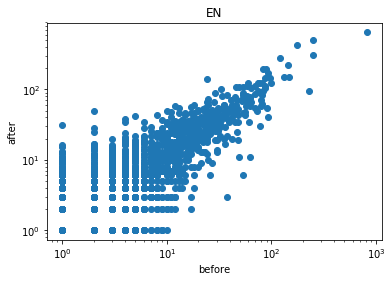

In [264]:
individualdegree(EnBG,EnAG,"EN")

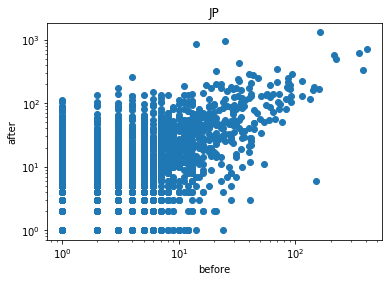

In [265]:
individualdegree(JpBG,JpAG,"JP")

### 累积度对比图

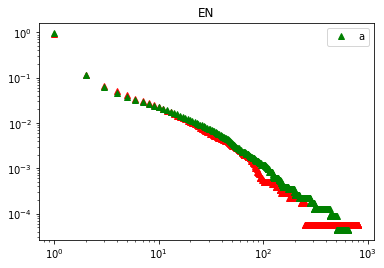

In [266]:
draw_degree_chart(EnBG,EnAG,"EN")

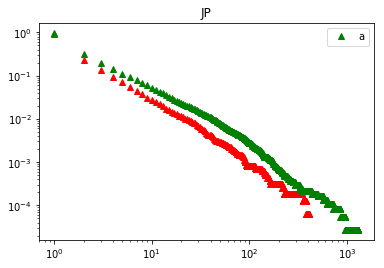

In [267]:
draw_degree_chart(JpBG,JpAG,"JP")